In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1522 to 2128
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
1522,49.6,16.5,6.03,11.1,460,27.4,33.3,82.3,36,M,out
2584,47.4,16.8,5.45,6.8,213,30.8,35.4,87.0,54,M,out
2500,39.1,13.0,5.08,7.3,214,25.6,33.2,77.0,53,F,in
2048,43.1,13.8,4.88,6.4,160,28.3,32.0,88.3,45,F,in
2000,28.7,9.5,3.04,6.8,79,31.3,33.1,94.4,45,M,in


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,196
HAEMOGLOBINS,87
ERYTHROCYTE,222
LEUCOCYTE,149
THROMBOCYTE,269
MCH,108
MCHC,62
MCV,203
AGE,84
SEX,2


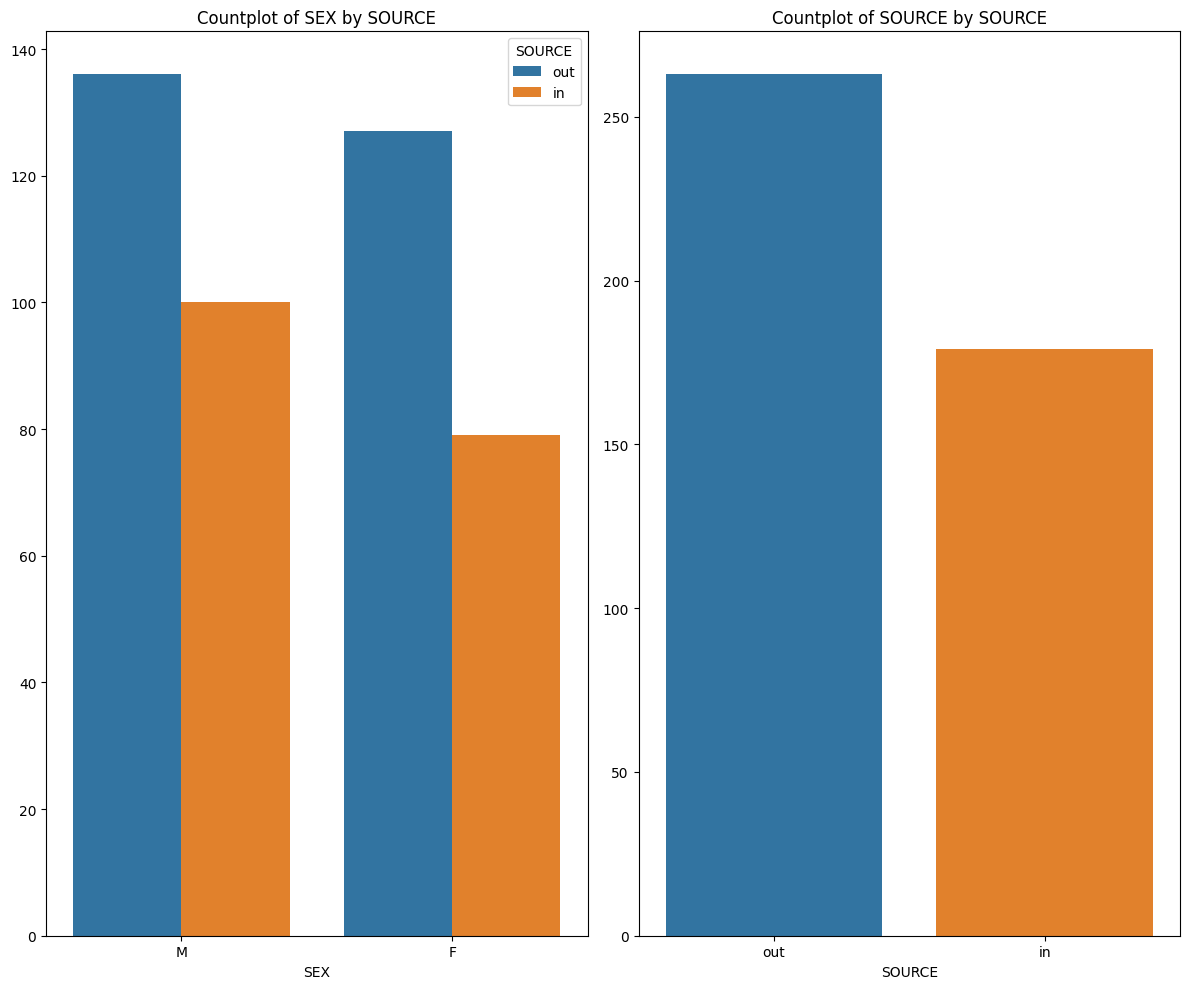

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.608597,5.758430,23.30,34.6250,39.60,42.8000,52.20
HAEMOGLOBINS,442.0,12.891403,1.996600,7.50,11.5000,13.20,14.3000,18.10
ERYTHROCYTE,442.0,4.547489,0.760440,2.46,4.0625,4.61,5.0675,7.11
LEUCOCYTE,442.0,8.445249,4.583381,1.10,5.4000,7.40,10.4750,29.30
THROMBOCYTE,442.0,249.147059,113.956604,8.00,174.2500,244.00,312.7500,798.00
MCH,442.0,28.525113,2.609042,16.80,27.4250,28.90,30.0000,37.80
MCHC,442.0,33.376923,1.147792,29.80,32.7000,33.40,34.0000,38.20
MCV,442.0,85.406561,6.639713,56.40,82.4250,86.00,89.3750,104.50
AGE,442.0,48.223982,20.883155,2.00,32.0000,49.00,66.0000,93.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

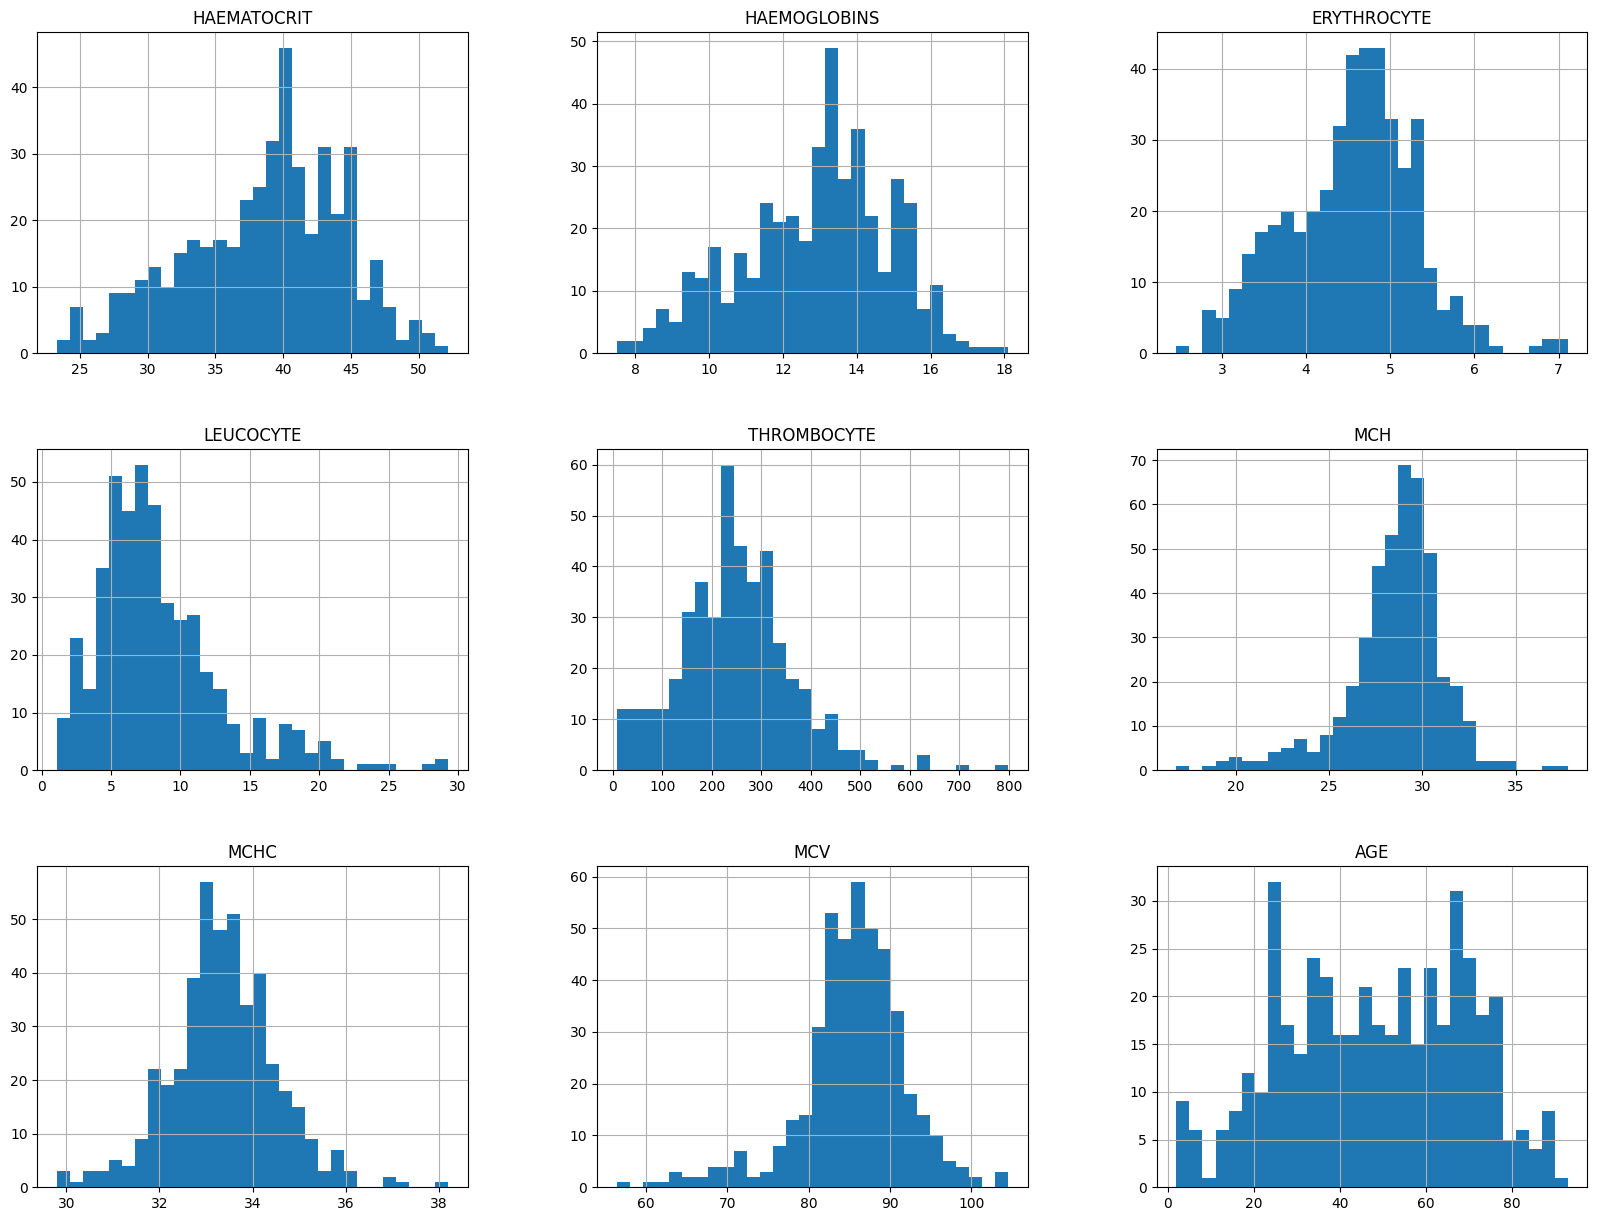

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

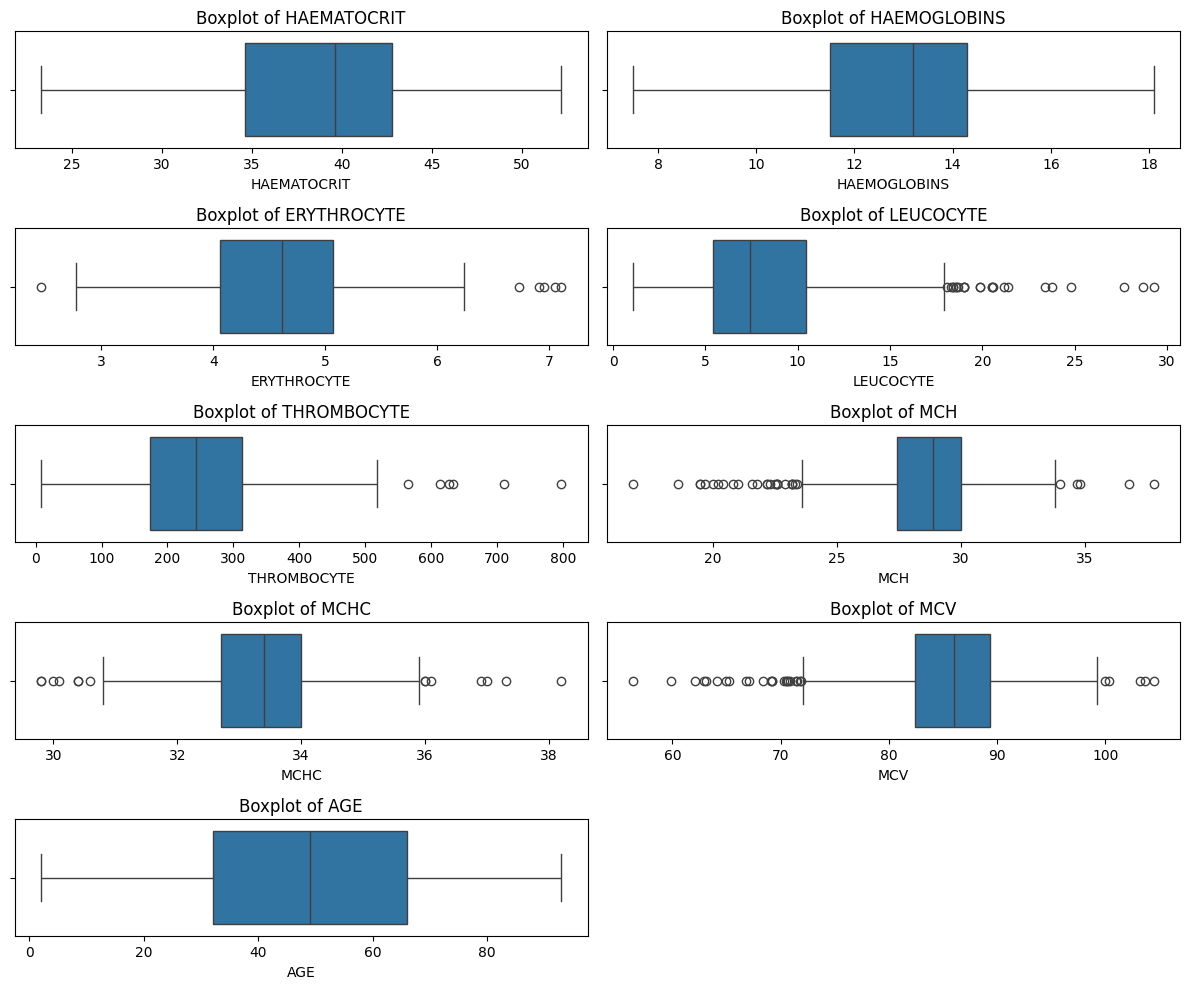

In [8]:
create_boxplots_from_df(df_numerical)

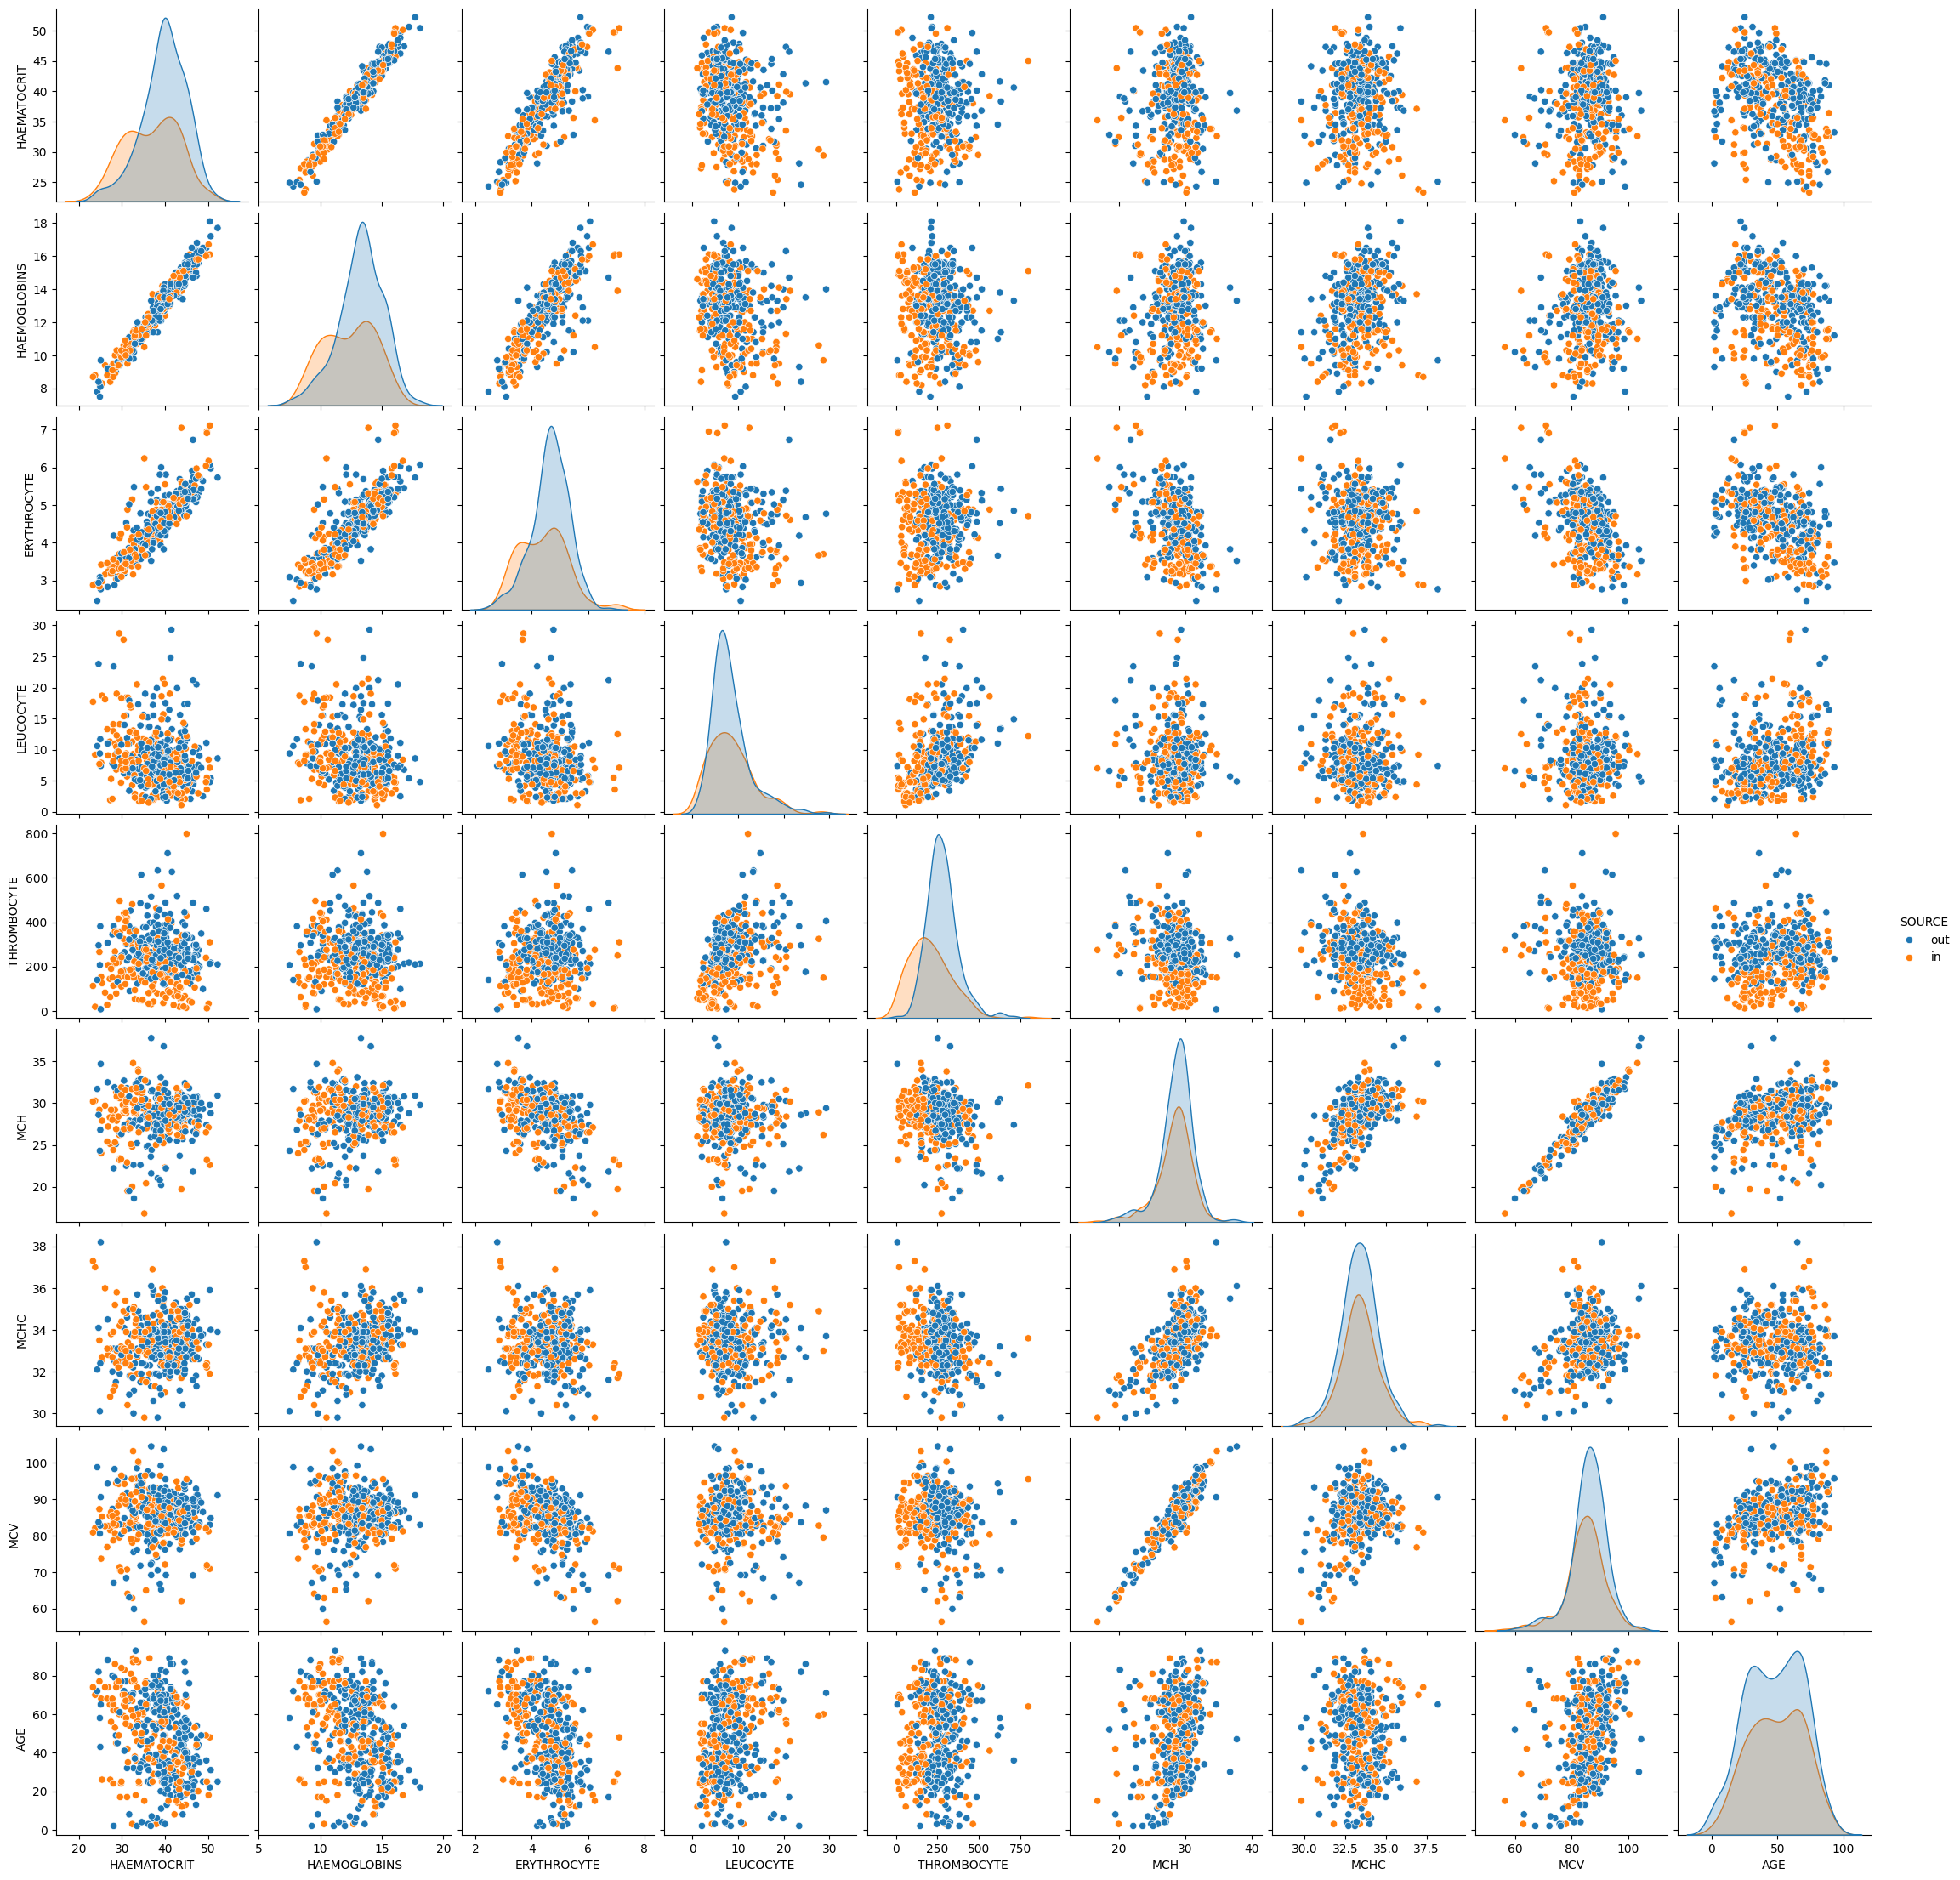

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.976982,0.869363,-0.245321,-0.010975,0.049569,0.061966,0.035443,-0.334557
HAEMOGLOBINS,0.976982,1.000000,0.817092,-0.243206,-0.060934,0.173683,0.269863,0.092190,-0.326178
ERYTHROCYTE,0.869363,0.817092,1.000000,-0.188894,0.036192,-0.412607,-0.097547,-0.451945,-0.459724
LEUCOCYTE,-0.245321,-0.243206,-0.188894,1.000000,0.391562,-0.062641,-0.015159,-0.065802,0.215648
THROMBOCYTE,-0.010975,-0.060934,0.036192,0.391562,1.000000,-0.177126,-0.245371,-0.103446,0.065888
MCH,0.049569,0.173683,-0.412607,-0.062641,-0.177126,1.000000,0.599489,0.934343,0.294596
MCHC,0.061966,0.269863,-0.097547,-0.015159,-0.245371,0.599489,1.000000,0.277315,0.001143
MCV,0.035443,0.092190,-0.451945,-0.065802,-0.103446,0.934343,0.277315,1.000000,0.352317
AGE,-0.334557,-0.326178,-0.459724,0.215648,0.065888,0.294596,0.001143,0.352317,1.000000


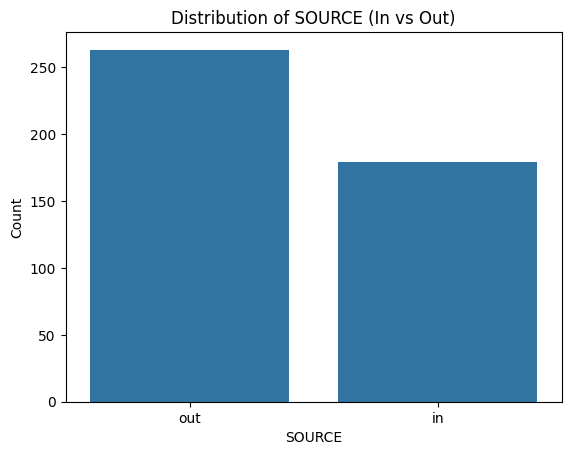

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
